# Karar Ağacı(Decision Tree)

**Çıkış amacı sınıflandırma içindir ancak tahmin için de kullanılabilir! Çok süper bir algoritma değildir!**

**Öncelikle (diyelim boy ve kilo için) 2 boyutlu bir tablo oluşturuluyor. Uzayı önce 2'ye bölüyor(diyelim 145'in solundakiler ve sağındakiler) nereden böleceğiz sorusunun temeli entropiye dayanıyor. Basitçe verilerin dağılımı ile alakalı denebilir!**

**Sonra diyelim 145'in üstündekilerden kilo 70'ten 2'ye böldük(altı ve üstü). Böyle seçim yapa yapa bölme işlemlerine devam ediyoruz.**

**Diyelim 6 bölmeye böldük ve bitirdik. Şimdi yapmamız gereken her bölgeye yaş ortalamalarını yazmak(o bölgede kalan noktaların ortalaması)**

**En sonda ise bu ortalamaları, oluşturduğumuz ağaca yerleştiriyoruz.**

**Yaş ortalamalarının yazıldığı kutucukların sayısı, bizim ağacımızı kaç parçaya böldüğümüzün sayısını verir!!!**

**Şimdi öğrenme aşaması bitti. Tahmin işlemini yaptırabiliriz. Boyu x, kilosu y ise yaşını tahmin et. Mesela boyu 183'ün üstünde ve kilosu 85'ten az ise 31.5 olarak tahmin eder!**

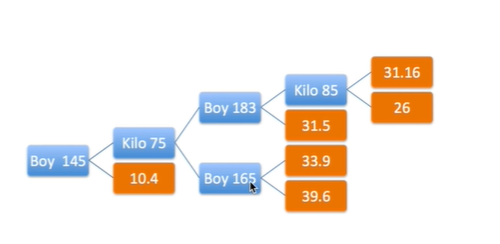

**Sıkıntısı şu: Değer uzayın neresine düşerse düşsün aynı yaş değerini tahmin eder!!**

**Mesela 31.5 yazan yere bakalım. Soldaki kırmızı çizginin tam yanına da düşse, sağdaki kırmızı çizginin tam yanına da düşse her seferinde 31.5 diye tahmin edecek.**

**Daha fazla detay, doğru seçim istersek: Daha fazla bölmeye ayırmamız gerekir!**

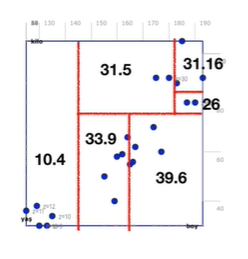

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [6]:
data = pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [9]:
x = data.iloc[:, 1:2]
y = data.iloc[:, -1:]

In [10]:
#karar ağacı işlemlerine geçiyoruz
rdr = DecisionTreeRegressor(random_state=0)
rdr.fit(x, y)

DecisionTreeRegressor(random_state=0)

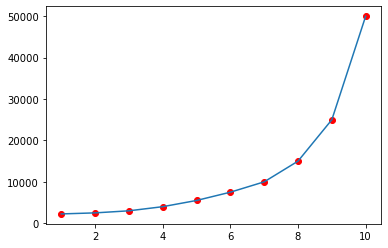

In [14]:
#görselleştirme
plt.scatter(x,y, color='red')
plt.plot(x, rdr.predict(x))

In [18]:
#spesifik predict
print(rdr.predict([[11]]))
print(rdr.predict([[6.6]]))

#10'dan büyük bütün değerleri 10'a sabitledi ondan aynı değeri verir.
#6-7 arasındaki sayılarda: 6-6.5 arasında 6'yı, 6.6-7  arasındaki sayılarda 7'yi verir!!!
#Değerleri trainledi ancak o değerleri direkt yazdığı için tahminlerde bizim elimizdeki verilere göre tahmin yapar!

[50000.]
[10000.]
